In [1]:
import numpy as np
import networkx as nx
import tsplib95
import matplotlib.pyplot as plt
import math
import functions as f
from tsp import experiment
from tqdm import tqdm

In [2]:
filename = "ch130.tsp"
problem = tsplib95.load(filename)
G  = problem.get_graph()
layout = nx.spring_layout(G,seed=0)
arr=np.array(G.nodes)
np.random.shuffle(arr)

In [3]:
def get_edge_list(array):
    res=[]

    for i in range(len(array)-1):
        res.append((array[i],array[i+1]))

    res.append((array[-1],array[0]))

    return res

def get_distance(node1, node2):
    return math.dist(node1['coord'],node2['coord'])

def get_fitness(edge_list):
    fitness=0
    for pair in edge_list:
        fitness += get_distance(G.nodes[pair[0]],G.nodes[pair[1]])
    return fitness

# get_distance(G.nodes[2],G.nodes[2])
edge_list = get_edge_list(arr)
get_fitness(edge_list)


43929.759591470436

In [4]:
print(type(arr))
print(get_edge_list([i[0] for i in edge_list]))

<class 'numpy.ndarray'>
[(25, 48), (48, 7), (7, 128), (128, 105), (105, 38), (38, 68), (68, 44), (44, 87), (87, 86), (86, 49), (49, 27), (27, 12), (12, 20), (20, 51), (51, 93), (93, 52), (52, 18), (18, 14), (14, 37), (37, 76), (76, 66), (66, 47), (47, 45), (45, 120), (120, 121), (121, 16), (16, 90), (90, 5), (5, 21), (21, 30), (30, 80), (80, 85), (85, 81), (81, 103), (103, 122), (122, 58), (58, 95), (95, 1), (1, 4), (4, 89), (89, 110), (110, 6), (6, 10), (10, 67), (67, 34), (34, 99), (99, 117), (117, 55), (55, 29), (29, 23), (23, 88), (88, 77), (77, 106), (106, 104), (104, 15), (15, 101), (101, 13), (13, 116), (116, 97), (97, 112), (112, 82), (82, 50), (50, 126), (126, 24), (24, 56), (56, 63), (63, 118), (118, 111), (111, 109), (109, 74), (74, 64), (64, 3), (3, 114), (114, 61), (61, 11), (11, 8), (8, 42), (42, 84), (84, 65), (65, 115), (115, 54), (54, 19), (19, 2), (2, 9), (9, 92), (92, 28), (28, 83), (83, 33), (33, 22), (22, 71), (71, 32), (32, 70), (70, 124), (124, 60), (60, 100), (1

In [5]:
dictionary = dict()
G.nodes[1]['coord']
for i in range(1,len(G.nodes)+1):
    dictionary[i] = G.nodes[i]['coord']
# print (dictionary)

Closest neighbour path, Fitness: 8262.97871561905
[(1, 41), (41, 39), (39, 117), (117, 112), (112, 115), (115, 28), (28, 62), (62, 105), (105, 128), (128, 16), (16, 45), (45, 5), (5, 11), (11, 76), (76, 109), (109, 61), (61, 129), (129, 124), (124, 64), (64, 69), (69, 86), (86, 88), (88, 26), (26, 7), (7, 97), (97, 70), (70, 107), (107, 127), (127, 104), (104, 43), (43, 34), (34, 17), (17, 31), (31, 27), (27, 19), (19, 100), (100, 15), (15, 29), (29, 24), (24, 116), (116, 95), (95, 79), (79, 87), (87, 12), (12, 81), (81, 103), (103, 77), (77, 94), (94, 89), (89, 110), (110, 98), (98, 68), (68, 63), (63, 48), (48, 25), (25, 113), (113, 32), (32, 36), (36, 84), (84, 119), (119, 111), (111, 123), (123, 101), (101, 82), (82, 57), (57, 9), (9, 56), (56, 65), (65, 52), (52, 75), (75, 74), (74, 99), (99, 73), (73, 92), (92, 38), (38, 106), (106, 53), (53, 120), (120, 58), (58, 49), (49, 72), (72, 91), (91, 6), (6, 102), (102, 10), (10, 14), (14, 67), (67, 13), (13, 96), (96, 122), (122, 55), 

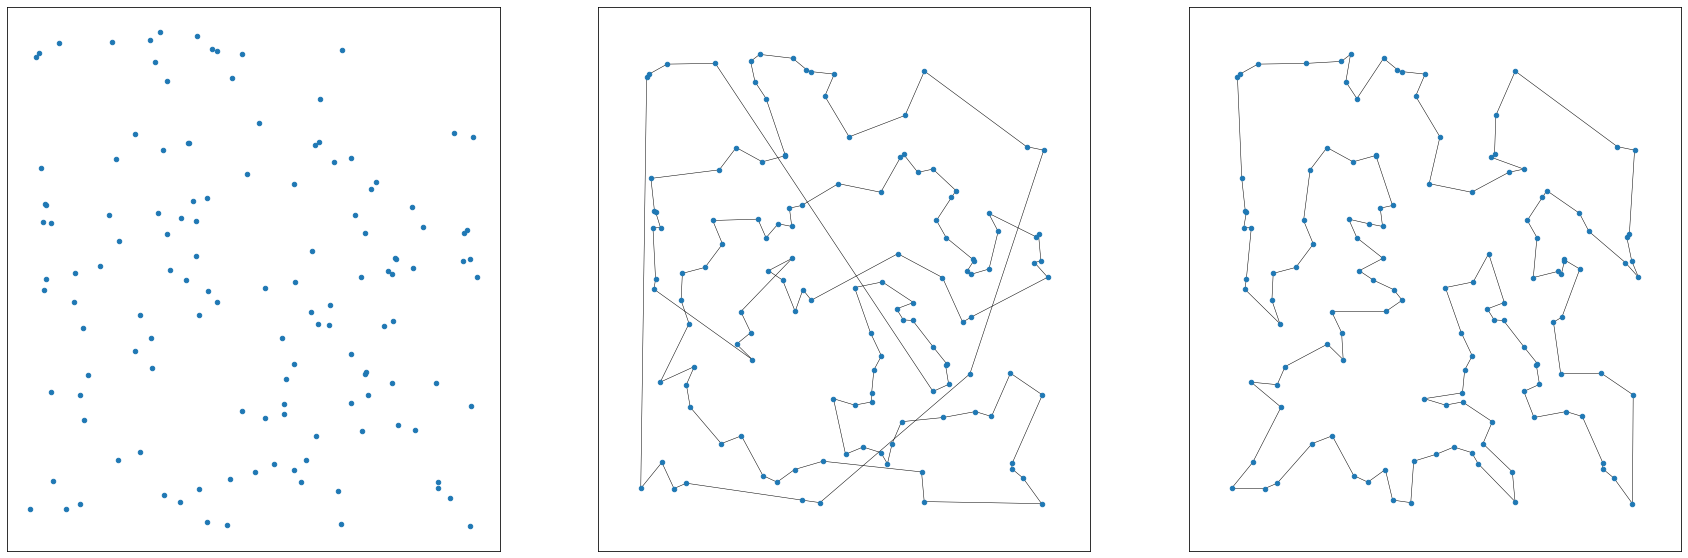

In [6]:
solution = tsplib95.load("ch130.opt.tour").tours[0]
solution = get_edge_list(solution)
fig, axs = plt.subplots(1,3, figsize=(30,10))
# fit = str(f.get_fitness(G,solution))
nx.draw_networkx_nodes(G, pos=dictionary, node_size=20, ax=axs[0])
# print(f"Optimal path, Fitness: " + fit)
# nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=20, edgelist=[], ax=axs[1], label=fit)
# nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=solution, ax=axs[1], label=fit)



path = f.closest_neighbor_alg(G)
fit = str(f.get_fitness(G,f.get_edge_list(path)))
print(f"Closest neighbour path, Fitness: " + fit)
nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=20, edgelist=[], ax=axs[1], label=fit)
nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=f.get_edge_list(path), ax=axs[1], label=fit)

print(solution)
nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=20, edgelist=[], ax=axs[2], label=fit)
nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=solution, ax=axs[2], label=fit)
plt.show()

In [7]:
p1 = f.generate_random_inividual(G)
p2 = f.generate_random_inividual(G)

child = f.crossover(p1.get_path(), p2.get_path())

f.plot_figure(G, p1.edge_list,name="parent1.jpg")
f.plot_figure(G, p2.edge_list,name="parent2.jpg")
f.plot_figure(G, f.get_edge_list(child),name="child.jpg")


<Figure size 432x288 with 0 Axes>

In [8]:

# 0 not in [2]
# G.nodes[3]

In [9]:

fits = []
for i in tqdm(range(10)):
    fits.append(f.get_fitness(G,f.get_edge_list(f.closest_neighbor_alg(G))))

print(np.mean(fits), np.std(fits))



100%|██████████| 10/10 [00:00<00:00, 23.32it/s]

7731.919645563894 422.17761603501015


In [10]:
%%time

experiment(filename="att48.tsp", iterations=1000, interval = 100, pop_size=20)

TSP problem used:   att48.tsp
Num. iterations:    1000
Interval:           100
Population size:    20
Mutation rate:      0.1
Show outputs:       True
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Best fitness: 44905.59388214723
CPU times: total: 6.14 s
Wall time: 6.62 s
